In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Product item & their category

In [2]:
root_path = "/kaggle/input/competitive-data-science-predict-future-sales/"
root_path = "."
itemsDf = pd.read_csv(f"{root_path}/items.csv")
itemsDf

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
...                                                  ...      ...   
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165   
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166   
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167   
22168                                Яйцо для Little Inu    22168   
22169                      Яйцо дракона (Игра престолов)    22169   

       item_category_id  
0                    40  
1                    76  
2                    40  
3                    40  
4                    40  
...                 ...  
22165                31  
22166                54  
22167                49  
22168                62  
22169                69  

[22170 rows x 3 columns]

In [3]:
print ("Number of category:", len(itemsDf.item_category_id.unique()))
itemsDf.item_category_id.hist(bins = len(itemsDf.item_category_id.unique()))

Number of category: 84


In [4]:
pd.options.display.max_rows = 999
itemsCatDf = pd.read_csv(f"{root_path}/item_categories.csv")
itemsCatDf.head(100)

item_category_name  item_category_id
0                    PC - Гарнитуры/Наушники                 0
1                           Аксессуары - PS2                 1
2                           Аксессуары - PS3                 2
3                           Аксессуары - PS4                 3
4                           Аксессуары - PSP                 4
5                        Аксессуары - PSVita                 5
6                      Аксессуары - XBOX 360                 6
7                      Аксессуары - XBOX ONE                 7
8                             Билеты (Цифра)                 8
9                            Доставка товара                 9
10                     Игровые консоли - PS2                10
11                     Игровые консоли - PS3                11
12                     Игровые консоли - PS4                12
13                     Игровые консоли - PSP                13
14                  Игровые консоли - PSVita                14
15                Игровые консоли - XBOX 360                15
16                Игровые консоли - XBOX ONE                16
17                  Игровые консоли - Прочие                17
18                                Игры - PS2                18
19                                Игры - PS3                19
20                                Игры - PS4                20
21                                Игры - PSP                21
22                             Игры - PSVita                22
23                           Игры - XBOX 360                23
24                           Игры - XBOX ONE                24
25                 Игры - Аксессуары для игр                25
26                      Игры Android - Цифра                26
27                          Игры MAC - Цифра                27
28          Игры PC - Дополнительные издания                28
29           Игры PC - Коллекционные издания                29
30             Игры PC - Стандартные издания                30
31                           Игры PC - Цифра                31
32         Карты оплаты (Кино, Музыка, Игры)                32
33                      Карты оплаты - Live!                33
34              Карты оплаты - Live! (Цифра)                34
35                        Карты оплаты - PSN                35
36            Карты оплаты - Windows (Цифра)                36
37                            Кино - Blu-Ray                37
38                         Кино - Blu-Ray 3D                38
39                         Кино - Blu-Ray 4K                39
40                                Кино - DVD                40
41                      Кино - Коллекционное                41
42             Книги - Артбуки, энциклопедии                42
43                        Книги - Аудиокниги                43
44                Книги - Аудиокниги (Цифра)                44
45                     Книги - Аудиокниги 1С                45
46                 Книги - Бизнес литература                46
47                    Книги - Комиксы, манга                47
48           Книги - Компьютерная литература                48
49         Книги - Методические материалы 1С                49
50                          Книги - Открытки                50
51         Книги - Познавательная литература                51
52                      Книги - Путеводители                52
53         Книги - Художественная литература                53
54                             Книги - Цифра                54
55       Музыка - CD локального производства                55
56       Музыка - CD фирменного производства                56
57                              Музыка - MP3                57
58                            Музыка - Винил                58
59                Музыка - Музыкальное видео                59
60               Музыка - Подарочные издания                60
61                      Подарки - Атрибутика                61
62          Подарки - Гаджеты, роботы, спорт             

Google Translate suggest that the first word is the category and the words after are the sub-category e.g. Book - Fiction, Item - Battery etc

So we can engineer two extra feature from here later on.

Text(0.5,0,'Category')

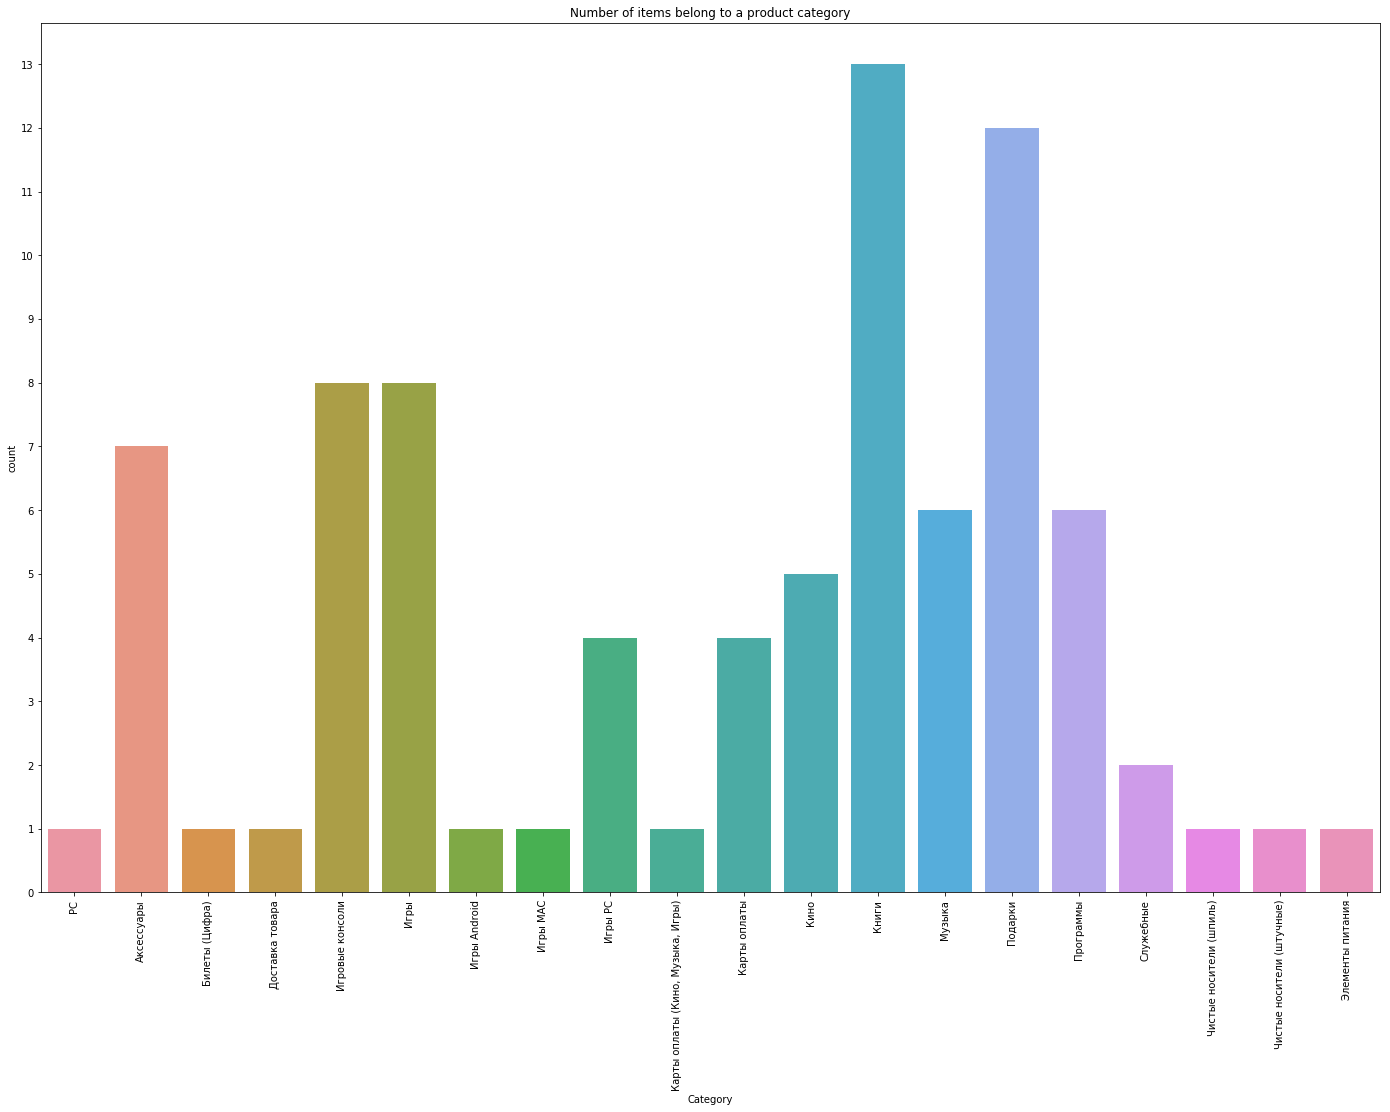

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(24,16))
itemsCatDf["category"] = itemsCatDf.item_category_name.str.split("-").apply(lambda x: x[0].strip())
itemsCatDf["subCategory"] = itemsCatDf.item_category_name.str.split("-").apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
sns.countplot(itemsCatDf.category)
plt.title("Number of items belong to a product category")
plt.yticks(np.arange(0,14,1))
plt.xticks(rotation=90)
plt.xlabel("Category")


Text(0.5,0,'Sub category')

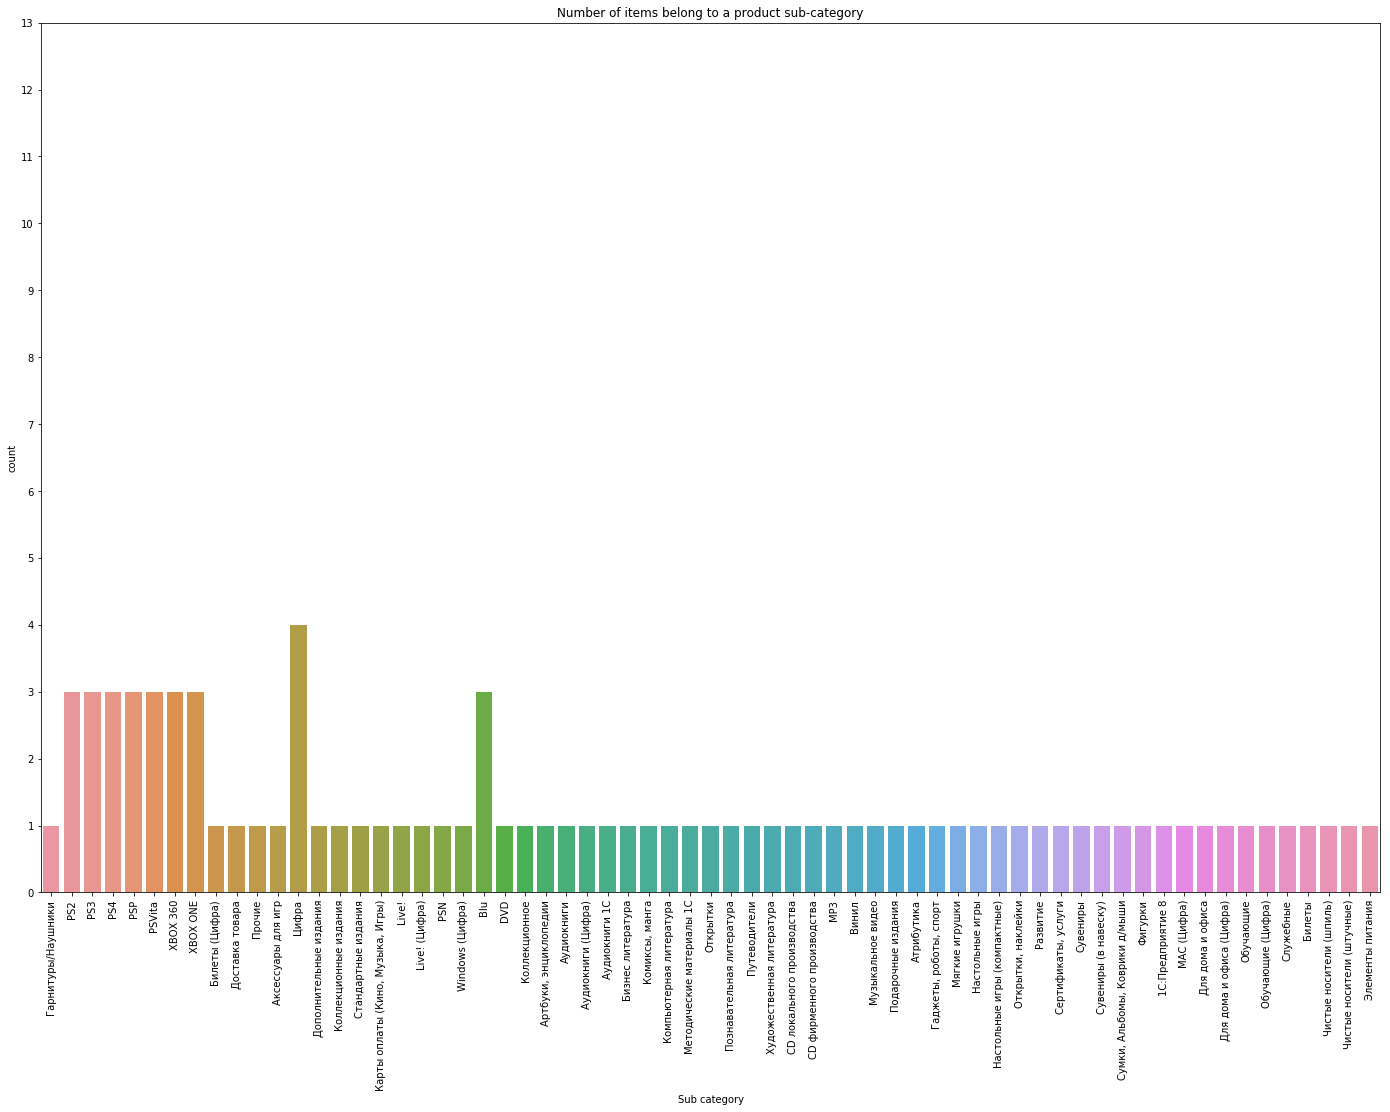

In [6]:
fig = plt.figure(figsize=(24,16))

sns.countplot(itemsCatDf.subCategory)
plt.title("Number of items belong to a product sub-category")

plt.yticks(np.arange(0,14,1))
plt.xticks(rotation=90)
plt.xlabel("Sub category")


It could be useful to use these two new columns as features

# Shop information

In [7]:
shopDf = pd.read_csv(f"{root_path}/shops.csv")
shopDf.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

Google translate suggest that the shop_name seems like an address, with the first word always corresponds to city

In [8]:
print ("Number of shops:", len(shopDf.shop_id.unique()))

Number of shops: 60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

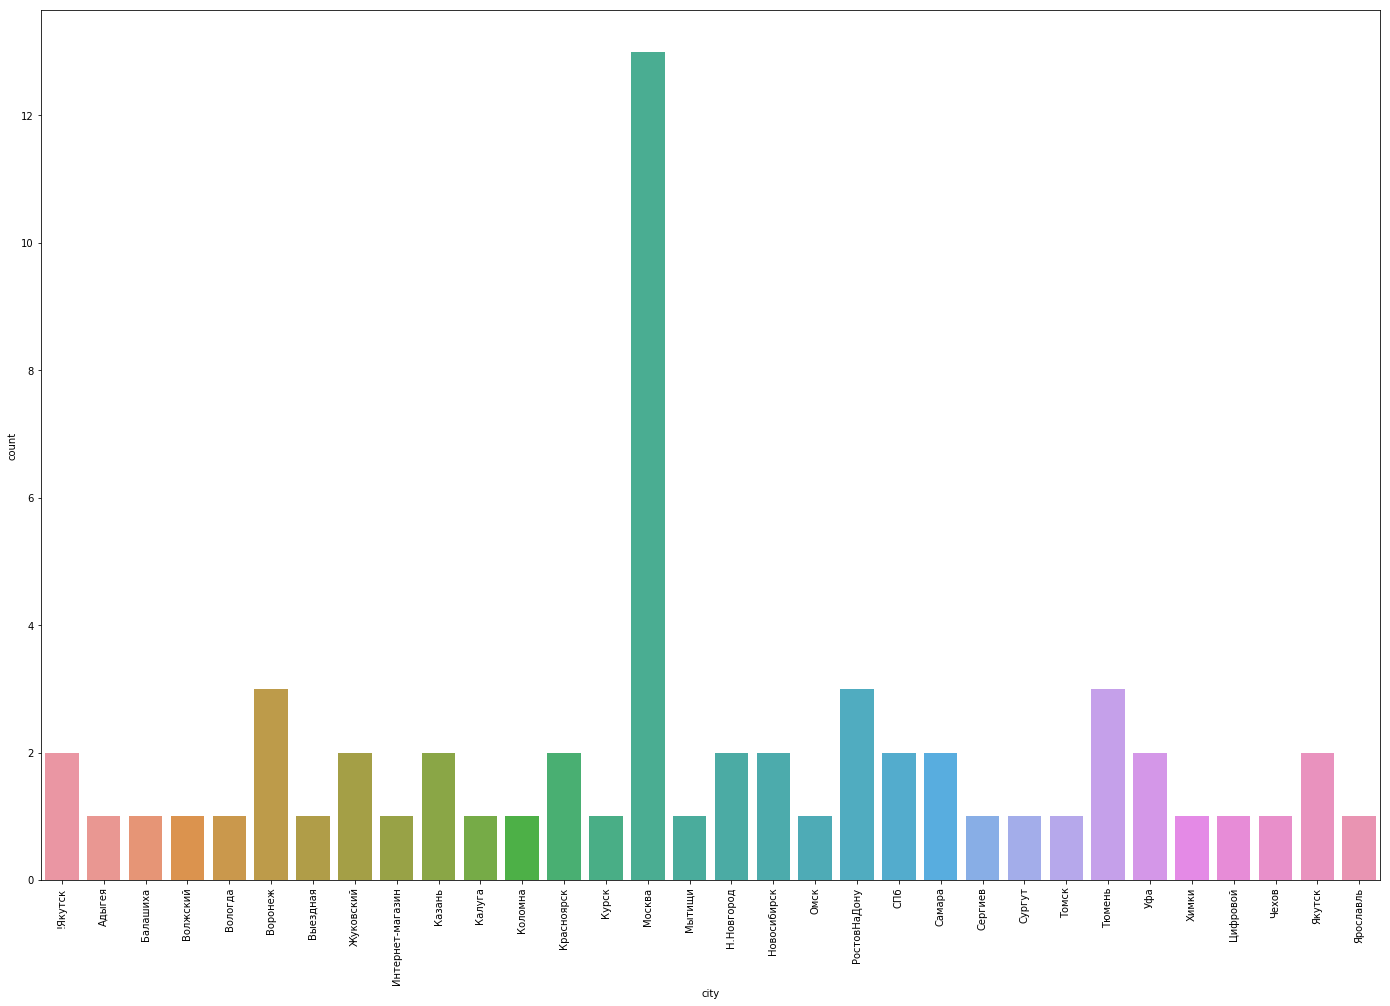

In [9]:
fig = plt.figure(figsize= (24,16))
shopDf["city"] = shopDf.shop_name.str.split(" ").apply(lambda x: x[0])
sns.countplot(shopDf.city)
plt.xticks(rotation=90)

Москва is Moscow and it has the most shops

# Sales information

In [10]:
trainDf = pd.read_csv(f"{root_path}/sales_train.csv")
print (trainDf.columns)
trainDf.head()

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')


date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [11]:
trainDf.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

Notice some negative sales above

In [12]:
print ("Detail of negative sales")
returnDf = trainDf[trainDf.item_cnt_day < 0]
returnDf.describe()

Detail of negative sales


date_block_num      shop_id       item_id    item_price  item_cnt_day
count      7356.00000  7356.000000   7356.000000   7356.000000   7356.000000
mean         14.63037    32.514546   8982.021207   1442.945623     -1.025150
std           9.43772    16.825725   6166.315366   2419.680132      0.368794
min           0.00000     2.000000     28.000000      0.500000    -22.000000
25%           7.00000    19.000000   3734.000000    349.000000     -1.000000
50%          13.00000    31.000000   6927.000000    799.000000     -1.000000
75%          23.00000    47.000000  14056.000000   1699.000000     -1.000000
max          33.00000    59.000000  22167.000000  33490.000000     -1.000000

In [13]:
returnDf.item_id.value_counts(ascending=False)

2331     56
3734     41
1915     32
5672     31
4332     27
         ..
6484      1
7838      1
20764     1
1701      1
4102      1
Name: item_id, Length: 3511, dtype: int64

Some items are returned many times

In [14]:
trainDf.groupby("item_id").item_price.apply(lambda x: len(x.unique())).sort_values(ascending = False)

item_id
17717    1601
11373     427
11369     344
11370     335
6675      217
         ... 
9357        1
9360        1
9365        1
9368        1
0           1
Name: item_price, Length: 21807, dtype: int64

Some items has a lot of different prices

In [15]:
trainDf[trainDf.item_id == 17717]

date  date_block_num  shop_id  item_id  item_price  \
5141     11.01.2013               0       25    17717      1099.0   
8285     16.01.2013               0       19    17717       299.0   
13890    20.01.2013               0       22    17717       999.0   
13891    23.01.2013               0       22    17717       399.0   
13892    31.01.2013               0       22    17717       990.0   
...             ...             ...      ...      ...         ...   
2930742  14.10.2015              33       22    17717      2150.0   
2930743  15.10.2015              33       22    17717      1474.5   
2930744  16.10.2015              33       22    17717      2150.0   
2930745  18.10.2015              33       22    17717       999.0   
2930746  30.10.2015              33       22    17717       429.0   

         item_cnt_day  
5141              2.0  
8285              2.0  
13890             1.0  
13891             1.0  
13892             1.0  
...               ...  
2930742           1.0  
2930743           2.0  
2930744           1.0  
2930745           1.0  
2930746           1.0  

[9067 rows x 6 columns]

A closer look at one of these items shows prices are different in different shop, or even in the same shop but different day.

Google translating these item_name to English suggest that they are mostly related to refunds or delivery.

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24,24))
trainDf.groupby("date").item_cnt_day.sum().plot()
plt.title("Daily Sales")

Text(0.5,1,'Daily Sales')

Daily sales movement seems quite stationary, so maybe can use time series model to forecast

In [17]:
trainDf.groupby(["date_block_num"]).item_cnt_day.sum().plot()
plt.title("Monthly Sales")

Text(0.5,1,'Monthly Sales')

/home/deploy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=29.0, right=29.0
  'left=%s, right=%s') % (left, right))
/home/deploy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=15.0, right=15.0
  'left=%s, right=%s') % (left, right))
/home/deploy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=12.0, right=12.0
  'left=%s, right=%s') % (left, right))
/home/deploy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=32.0, right=32.0
  'l

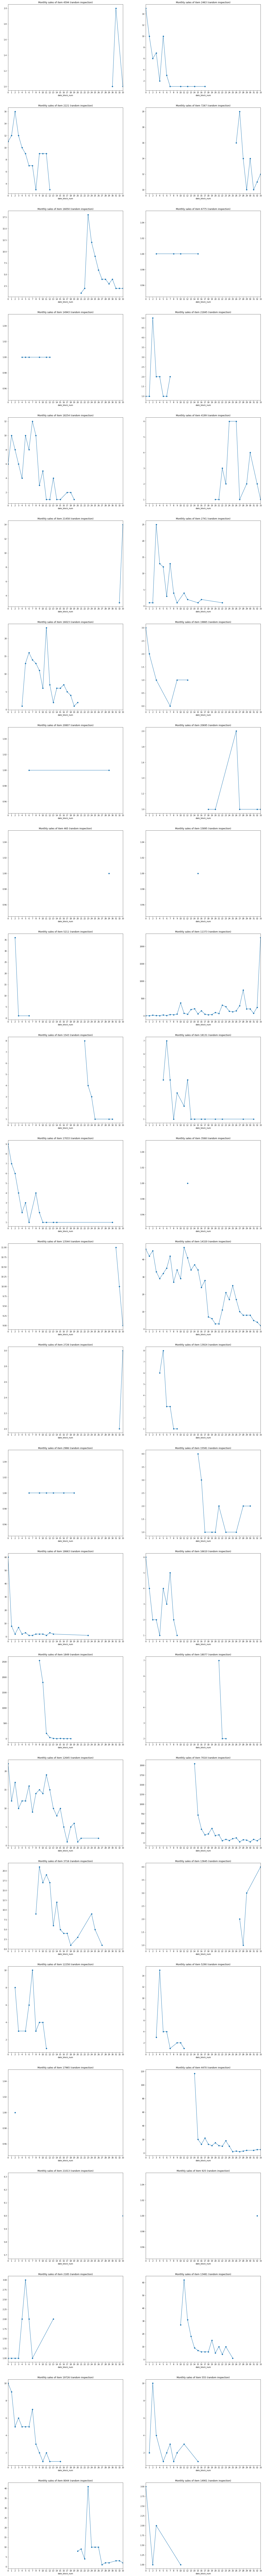

In [77]:
fig, axes = plt.subplots(nrows = 25, ncols = 2, figsize = (24, 250))
choices = trainDf.item_id.unique().tolist()
np.random.shuffle(choices)
for row in axes:
    for ax in row:
        num = choices.pop()
        # print (num)
        tmpDf = trainDf[trainDf.item_id == num].groupby(["date_block_num"]).item_cnt_day.sum()
        tmpDf.plot(ax = ax, style='o-')
        tmpDf.rolling().mean(2).plot(ax = ax, style='.-')
        tmpDf.rolling().std(2).plot(ax = ax, style='.-')
        tmpDf.rolling().mode(2).plot(ax = ax, style='.-')
        ax.set_title(f"Monthly sales of item {num} (random inspection)")
        ax.set_xticks(trainDf.date_block_num.sort_values().unique())
        ax.set_xlim(0,33)

A random run on the above code actual shows most item's sales is the highest when it was initally launched, which makes sense for things like ps3

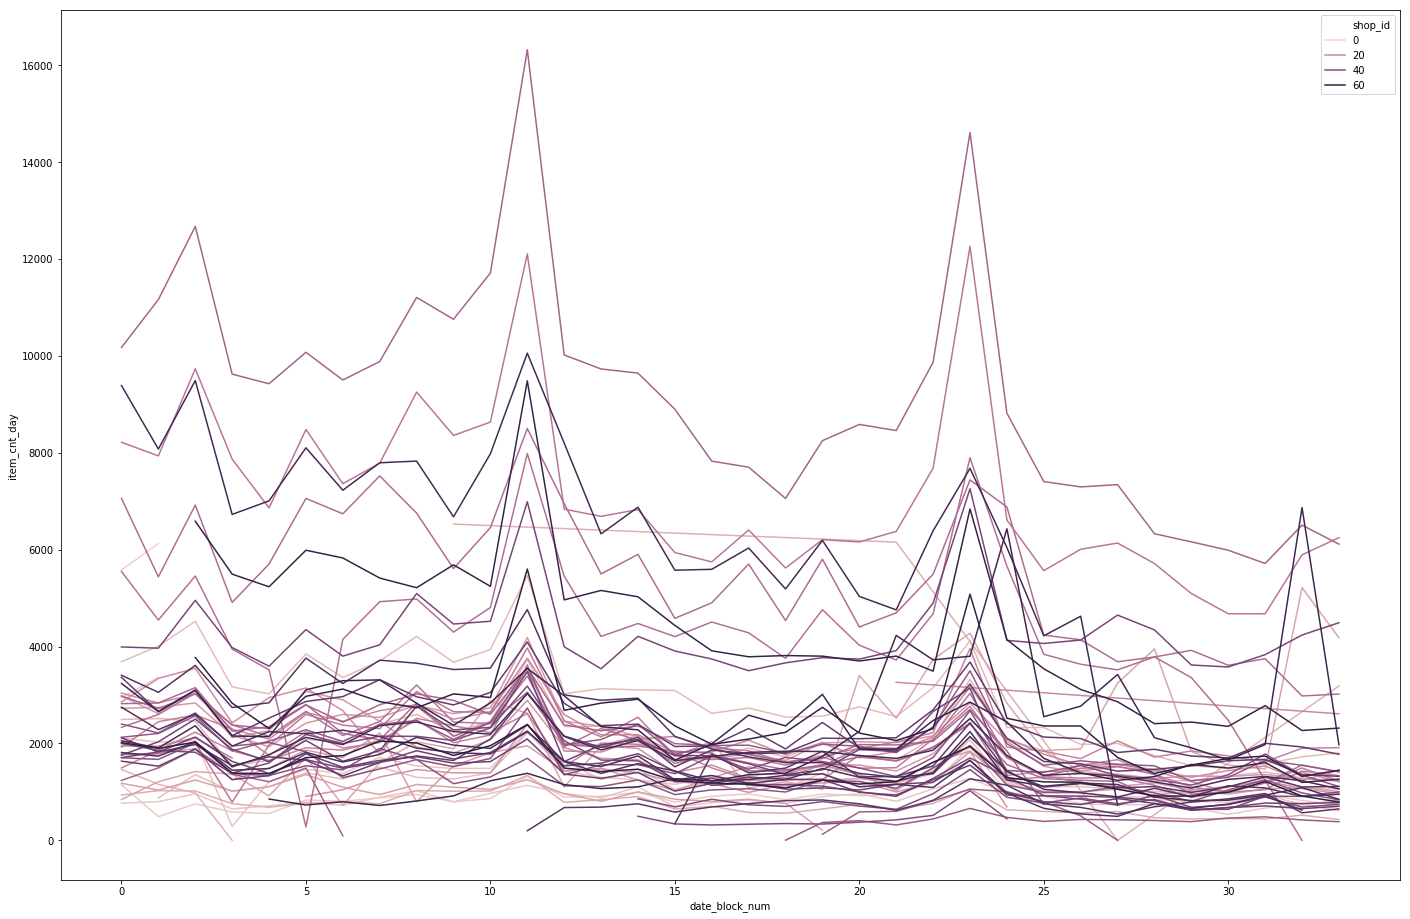

In [24]:
tmpDf = trainDf.groupby(["date_block_num", "shop_id"]).item_cnt_day.sum().reset_index()
tmpDf
fig = plt.figure(figsize = (24,16))
sns.lineplot(x="date_block_num", y="item_cnt_day", hue="shop_id", data=tmpDf)

Running the above cell block a few times suggest that sales generally peak at the same time (around november to December), while most shop exhibit a downward trend and very few a flat trend.


In [25]:
salesDf = trainDf.groupby(["shop_id", "date"]).item_cnt_day.sum().unstack().T.sort_index()
salesDf.index = pd.to_datetime(salesDf.index)
salesDf.sort_index(inplace = True)
salesDf.head()

shop_id        0      1     2     3     4     5      6     7     8   9   ...  \
date                                                                     ...   
2013-01-01    NaN    NaN  24.0   NaN   NaN   NaN    NaN  89.0  50.0 NaN  ...   
2013-01-02  228.0  105.0   NaN  22.0  75.0   NaN   99.0  61.0  33.0 NaN  ...   
2013-01-03    NaN    NaN  24.0  21.0  42.0  28.0  126.0  49.0  30.0 NaN  ...   
2013-01-04    NaN    NaN  14.0  11.0  27.0  27.0   66.0  53.0  -1.0 NaN  ...   
2013-01-05    NaN    NaN  23.0  25.0  54.0  56.0  140.0  62.0   NaN NaN  ...   

shop_id        50     51    52     53     54    55    56     57     58    59  
date                                                                          
2013-01-01    NaN  136.0   NaN    NaN  415.0   NaN   NaN    NaN    NaN   NaN  
2013-01-02   81.0   65.0  51.0   37.0  238.0   NaN  65.0    NaN    NaN  42.0  
2013-01-03   81.0   53.0  35.0   54.0  203.0   NaN  70.0  236.0  110.0  44.0  
2013-01-04   46.0   52.0  49.0   23.0  131.0   NaN  55.0  130.0   76.0  36.0  
2013-01-05  167.0  155.0  46.0  103.0  359.0  56.0  81.0  201.0    NaN  82.0  

[5 rows x 60 columns]

A quick transformation through unstacking and transposing can create a table show the sales of each shop at a particular day. Data that doesn't exist would give a NaN value.

In [26]:
salesDf.isnull().sum().sort_values(ascending= False).head()

shop_id
20    1025
9     1020
36    1020
11    1006
1      978
dtype: int64

You can actually see that some shops has a lot of missing records.

A quick view of the shop_id 0 can illustrate this point

In [27]:
trainDf[trainDf.shop_id == 0]

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
37589   12.01.2013               0        0    11059        73.0           1.0
37590   22.01.2013               0        0    11059        73.0           1.0
37591   26.01.2013               0        0    11059        73.0           1.0
37592   12.01.2013               0        0    11347       170.0           1.0
37593   22.01.2013               0        0    11347       170.0           1.0
...            ...             ...      ...      ...         ...           ...
183257  22.02.2013               1        0    13460      1228.0           2.0
183258  21.02.2013               1        0    13460      1228.0           1.0
183259  20.02.2013               1        0    13460      1228.0           1.0
183260  17.02.2013               1        0    13460      1228.0           1.0
183261  16.02.2013               1        0    12607        76.0           1.0

[9857 rows x 6 columns]

We can visualise the correlation with heat map, but for better illustration, I will drop the columns (shops) with too many NaN values

In [28]:
clean_salesDf = salesDf.dropna(thresh= len(salesDf) - 300,axis = 1)
clean_salesDf.isnull().sum().sort_values(ascending = False).head()

shop_id
43    285
30    256
54    208
12    208
29    159
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5]),
 <a list of 43 Text yticklabel objects>)

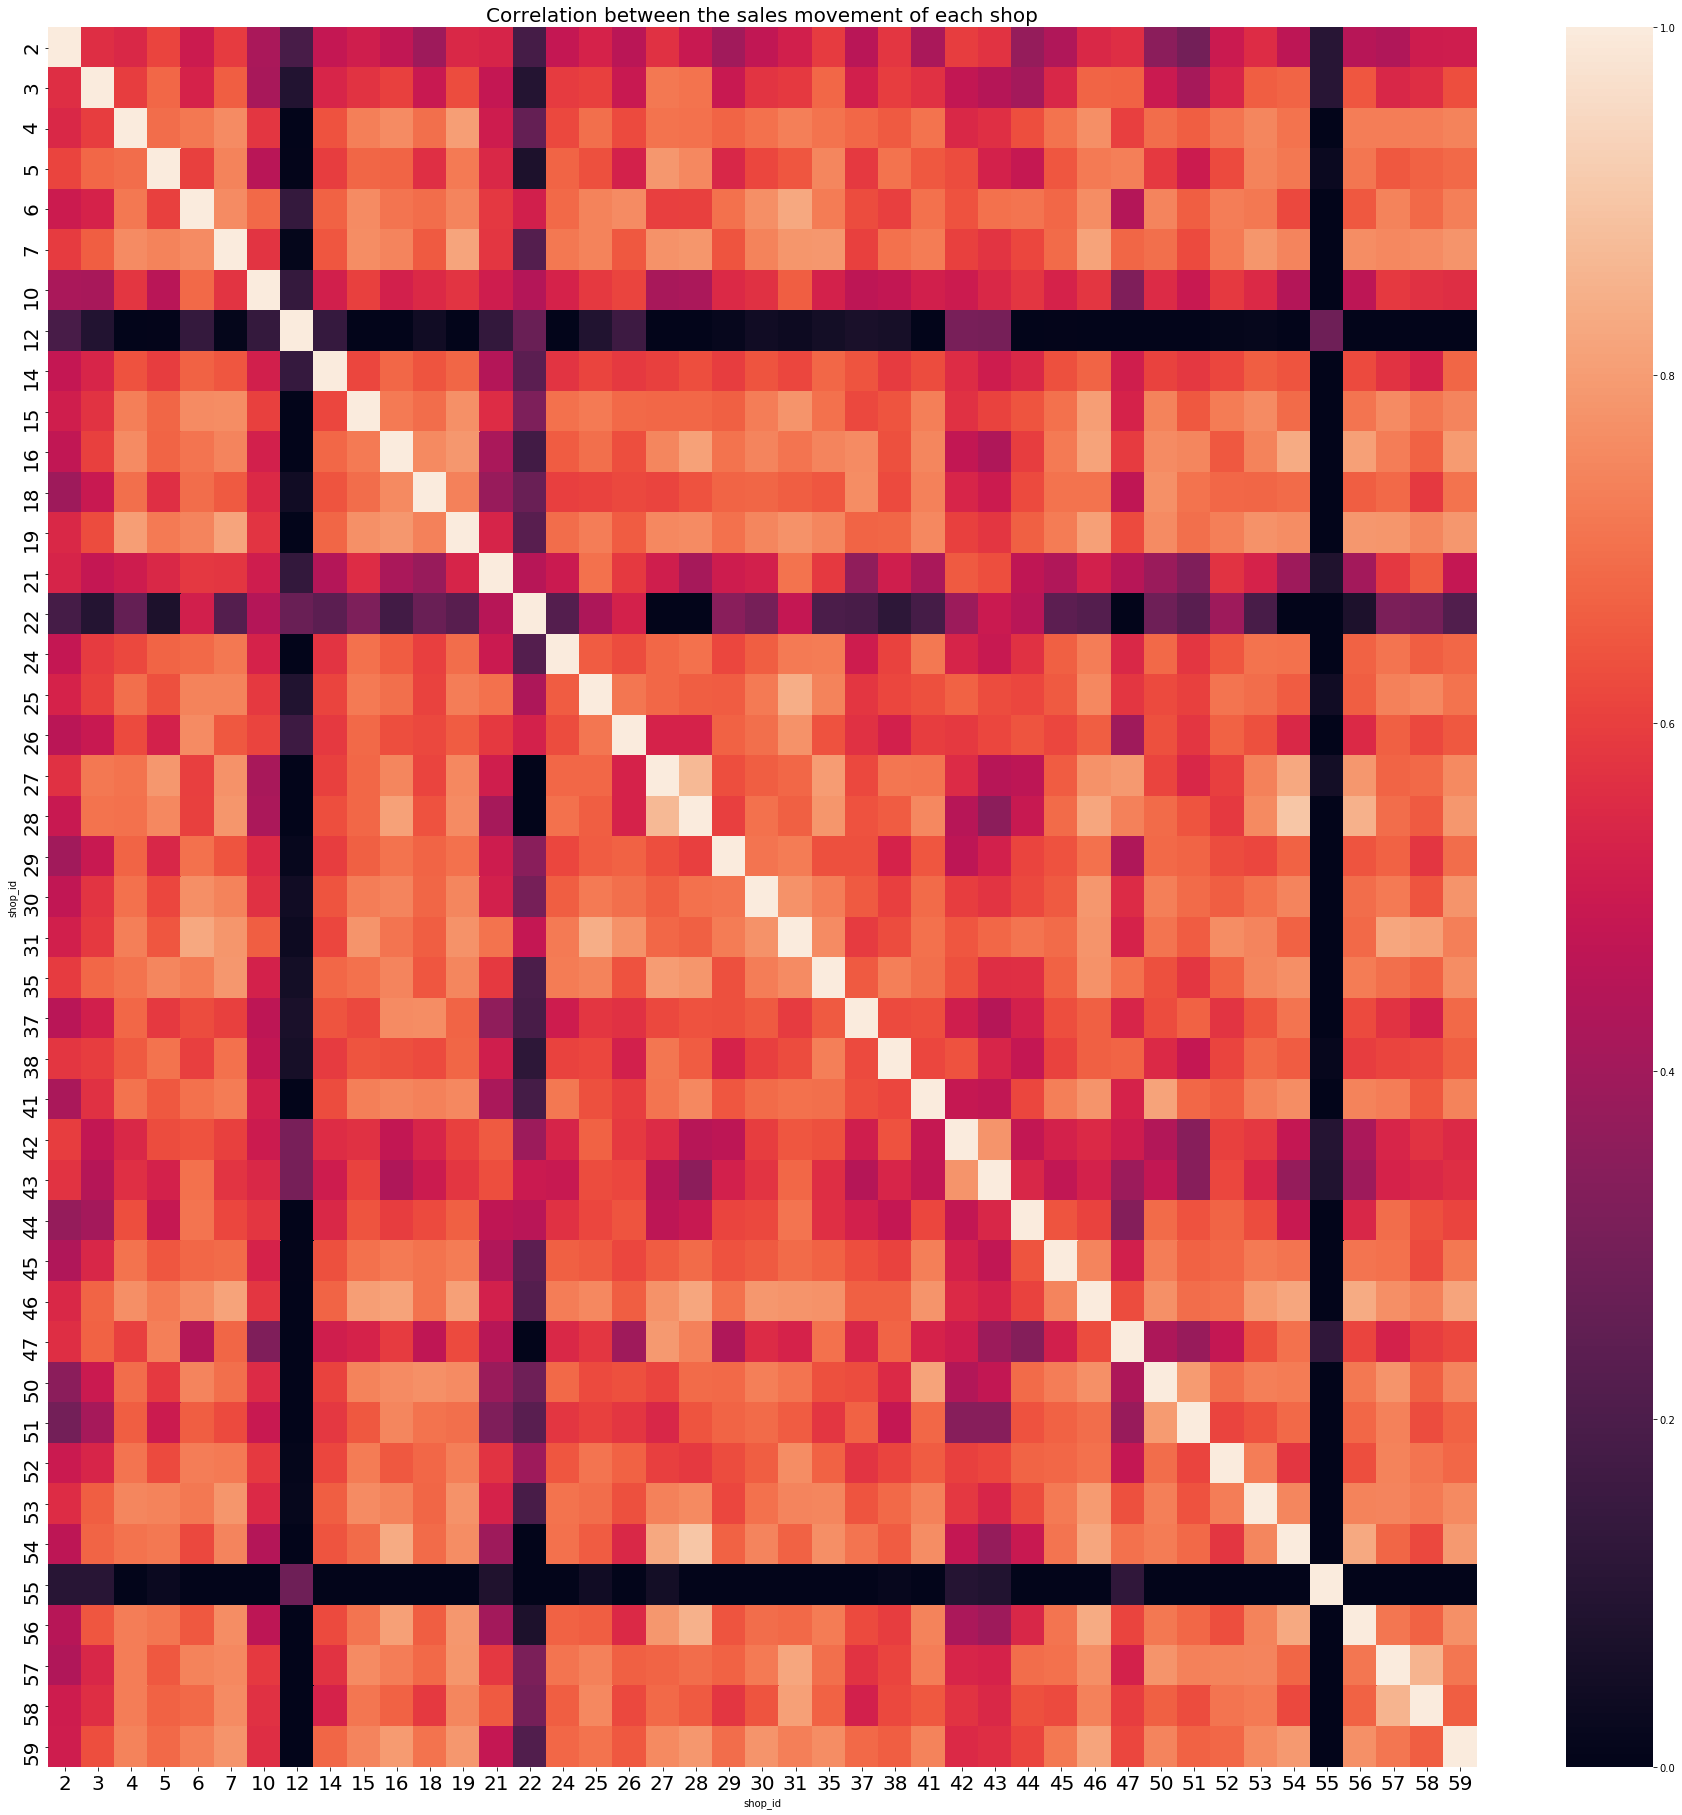

In [29]:
import seaborn as sns
fig = plt.figure(figsize = (32,32))
sns.heatmap(clean_salesDf.corr(), vmin=0, vmax=1)
plt.title("Correlation between the sales movement of each shop", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)

I will try visualise if theres any cyclic trend (yearly) as well

In [30]:
salesDf2 = pd.DataFrame(columns = ["total_sales", "monthday", "year"])

salesDf2["total_sales"] = salesDf.sum(axis = 1)

salesDf2.monthday = salesDf2.index
salesDf2.monthday= salesDf2.monthday.apply(lambda d: d.strftime("%m-%d"))
salesDf2.year = salesDf2.index.year
salesDf2.reset_index(inplace = True)

salesDf2.head()

date  total_sales monthday  year
0 2013-01-01       1951.0    01-01  2013
1 2013-01-02       3817.0    01-02  2013
2 2013-01-03       3846.0    01-03  2013
3 2013-01-04       2574.0    01-04  2013
4 2013-01-05       4863.0    01-05  2013

In [31]:
salesDf2.isnull().sum()

date           0
total_sales    0
monthday       0
year           0
dtype: int64

In [32]:
salesDf2.dropna(axis = 0, inplace = True)
salesDf2 = salesDf2.pivot(values = "total_sales", columns = "year", index = "monthday")


In [33]:
salesDf2.head()

year        2013    2014    2015
monthday                        
01-01     1951.0  2310.0  2117.0
01-02     3817.0  5711.0  3418.0
01-03     3846.0  5871.0  3229.0
01-04     2574.0  2070.0  1672.0
01-05     4863.0  3646.0  2877.0

In [34]:
import seaborn as sns
fig = plt.figure(figsize = (32,32))
sns.heatmap(salesDf2.corr(), vmin=0, vmax=1)
plt.title("Correlation between year", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

Correlation between year is minimal

In [35]:
salesDf2 = pd.DataFrame(columns = ["total_sales", "yearmonth", "day"])

salesDf2["total_sales"] = salesDf.sum(axis = 1)

salesDf2.yearmonth = salesDf2.index
salesDf2.yearmonth= salesDf2.yearmonth.apply(lambda d: d.strftime("%y-%m"))
salesDf2.day = salesDf2.index.day
salesDf2.reset_index(inplace = True)

salesDf2.head()

date  total_sales yearmonth  day
0 2013-01-01       1951.0     13-01    1
1 2013-01-02       3817.0     13-01    2
2 2013-01-03       3846.0     13-01    3
3 2013-01-04       2574.0     13-01    4
4 2013-01-05       4863.0     13-01    5

In [36]:
salesDf2.dropna(axis = 0, inplace = True)
salesDf2 = salesDf2.pivot(values = "total_sales", columns = "yearmonth", index = "day")


In [37]:
salesDf2.head(5)

yearmonth   13-01   13-02   13-03   13-04   13-05   13-06   13-07   13-08  \
day                                                                         
1          1951.0  8198.0  7422.0  6617.0  6346.0  5858.0  4984.0  4772.0   
2          3817.0  6145.0  5068.0  2330.0  3302.0  2974.0  3760.0  4430.0   
3          3846.0  6491.0  5476.0  3053.0  4427.0  4337.0  6766.0  7582.0   
4          2574.0  2536.0  2579.0  2748.0  4010.0  6293.0  5130.0  2506.0   
5          4863.0  4301.0  3914.0  3624.0  3390.0  2600.0  2738.0  3457.0   

yearmonth   13-09   13-10  ...   15-03   15-04   15-05   15-06   15-07  \
day                        ...                                           
1          3162.0  3142.0  ...  6779.0  6522.0  5754.0  5068.0  4722.0   
2          6802.0  5511.0  ...  1726.0  1828.0  2008.0  2654.0  3875.0   
3          6385.0  5073.0  ...  2015.0  2116.0  2455.0  3384.0  5301.0   
4          2779.0  2835.0  ...  2299.0  3817.0  3048.0  1964.0  1908.0   
5          3059.0  3435.0  ...  2272.0  1965.0  1349.0  1622.0  1703.0   

yearmonth   15-08   15-09   15-10   15-11   15-12  
day                                                
1          4461.0  4032.0  4404.0  3500.0  2354.0  
2          3175.0  1815.0  2318.0  2150.0  2120.0  
3          4003.0  3044.0  2011.0  1993.0  2118.0  
4          1855.0  1714.0  2144.0  3211.0  2302.0  
5          1997.0  1582.0  2171.0  1874.0  1274.0  

[5 rows x 36 columns]

In [38]:
import seaborn as sns
fig = plt.figure(figsize = (32,32))
sns.heatmap(salesDf2.corr(), vmin=0, vmax=1)
plt.title("Correlation between year-month", fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize=20, rotation = 360)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5]), <a list of 36 Text yticklabel objects>)

Text(0.5,1,'City vs Number of shops')

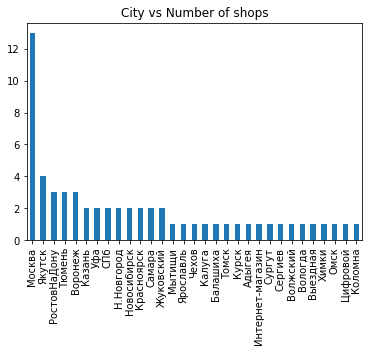

In [39]:
shopDf["city_code"] = shopDf.shop_name.str.split(" ").apply(lambda x: x[0].strip("!"))
shopDf.city_code.value_counts().plot.bar()
plt.title("City vs Number of shops")

In [40]:
itemsDf.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [41]:
itemsCatDf.head()

item_category_name  item_category_id    category         subCategory
0  PC - Гарнитуры/Наушники                 0          PC  Гарнитуры/Наушники
1         Аксессуары - PS2                 1  Аксессуары                 PS2
2         Аксессуары - PS3                 2  Аксессуары                 PS3
3         Аксессуары - PS4                 3  Аксессуары                 PS4
4         Аксессуары - PSP                 4  Аксессуары                 PSP

In [42]:
trainDf

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

In [43]:
monthDf = trainDf.groupby(["date_block_num", "shop_id", "item_id"]).item_cnt_day.sum().reset_index()
monthDf = monthDf.rename(columns={"item_cnt_day": "item_cnt_month"})

tempDf = trainDf.merge(monthDf, on=["date_block_num", "shop_id", "item_id"], how='left')
# tempDf = trainDf.merge(itemsDf.merge(itemsCatDf, on ="item_category_id"), on="item_id")

tempDf.drop(["date", "item_price", "item_cnt_day"], axis = 1, inplace = True)
tempDf.drop_duplicates(inplace = True)
tempDf = tempDf.merge(itemsDf.merge(itemsCatDf, on ="item_category_id"), on="item_id")
tempDf

date_block_num  shop_id  item_id  item_cnt_month  \
0                     0       59    22154             1.0   
1                     0       24    22154             1.0   
2                     0       27    22154             1.0   
3                     0       25    22154             5.0   
4                     0        6    22154             1.0   
...                 ...      ...      ...             ...   
1609119              33       25     8428             1.0   
1609120              33       25     7903             1.0   
1609121              33       25     7610             1.0   
1609122              33       25     7635             1.0   
1609123              33       25     7640             1.0   

                                                 item_name  item_category_id  \
0                                        ЯВЛЕНИЕ 2012 (BD)                37   
1                                        ЯВЛЕНИЕ 2012 (BD)                37   
2                                        ЯВЛЕНИЕ 2012 (BD)                37   
3                                        ЯВЛЕНИЕ 2012 (BD)                37   
4                                        ЯВЛЕНИЕ 2012 (BD)                37   
...                                                    ...               ...   
1609119                       АХ, ВОДЕВИЛЬ, ВОДЕВИЛЬ (rem)                40   
1609120  XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...                15   
1609121      WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13                64   
1609122  WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...                64   
1609123  WARHAMMER MINIATURES: Stormcast Eternals Palad...                64   

                 item_category_name         category      subCategory  
0                    Кино - Blu-Ray             Кино              Blu  
1                    Кино - Blu-Ray             Кино              Blu  
2                    Кино - Blu-Ray             Кино              Blu  
3                    Кино - Blu-Ray             Кино              Blu  
4                    Кино - Blu-Ray             Кино              Blu  
...                             ...              ...              ...  
1609119                  Кино - DVD             Кино              DVD  
1609120  Игровые консоли - XBOX 360  Игровые консоли         XBOX 360  
1609121   Подарки - Настольные игры          Подарки  Настольные игры  
1609122   Подарки - Настольные игры          Подарки  Настольные игры  
1609123   Подарки - Настольные игры          Подарки  Настольные игры  

[1609124 rows x 9 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

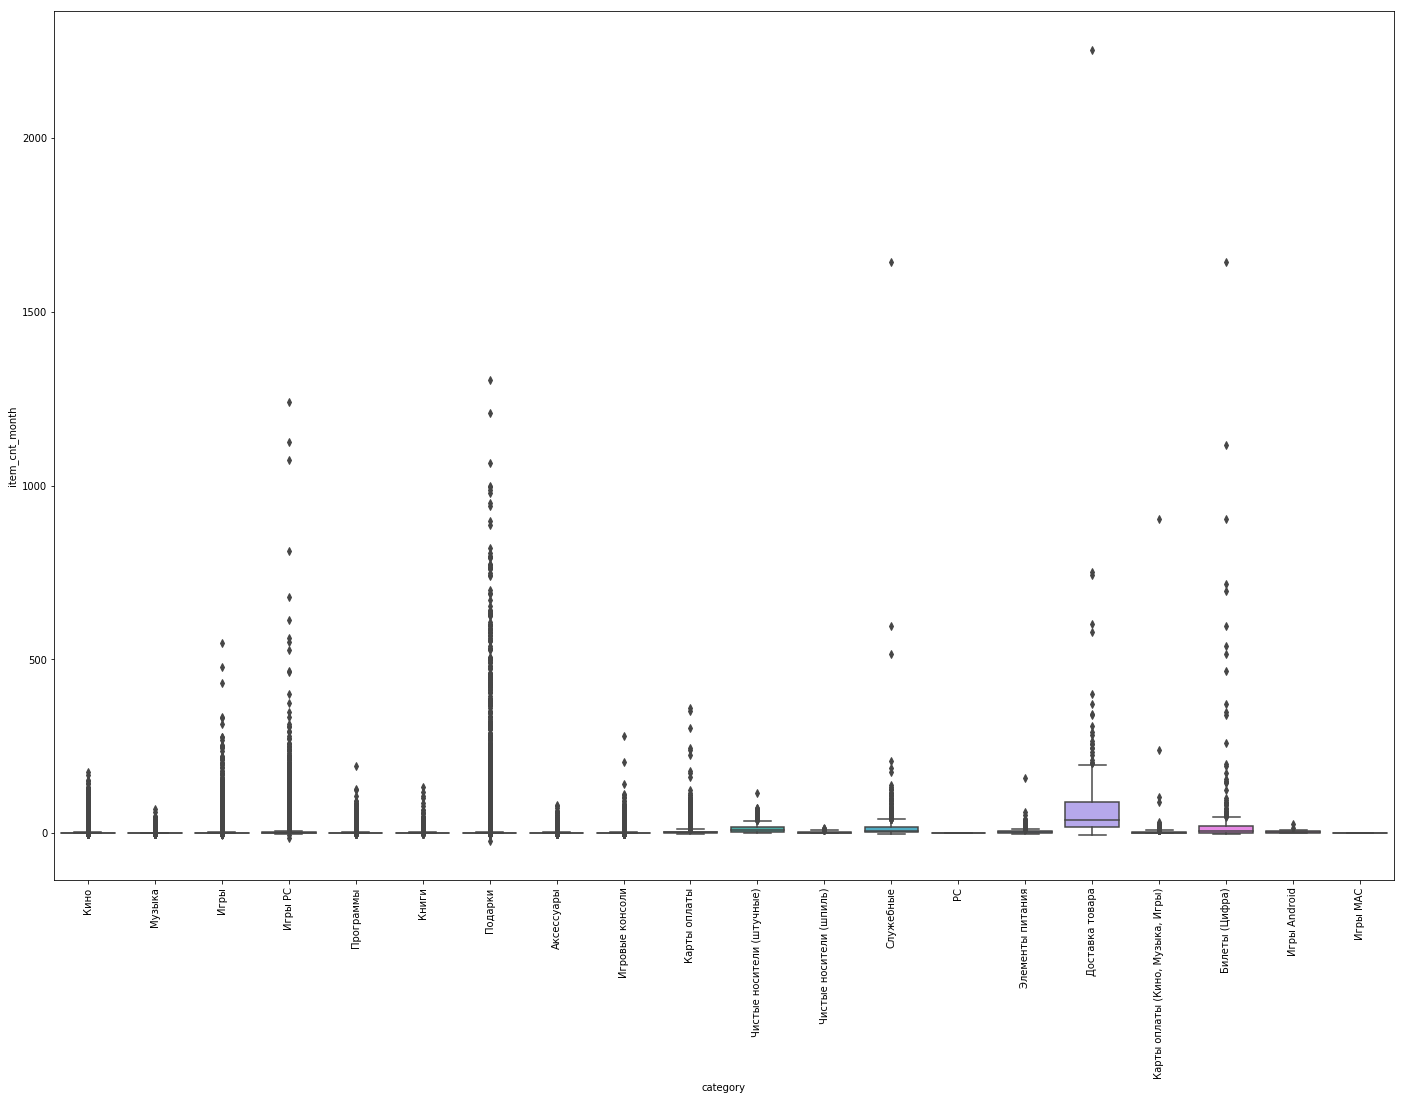

In [44]:
fig = plt.figure(figsize=(24,16))
sns.boxplot(x="category", y="item_cnt_month", data=tempDf)
plt.xticks(rotation =90)
# plt.ylim(0,5

In [45]:
fig = plt.figure(figsize=(24,16))
sns.boxplot(x="subCategory", y="item_cnt_month", data=tempDf)
plt.xticks(rotation =90)
# plt.ylim(0,50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

In [46]:
tempDf[(tempDf.item_id < 1000) & (tempDf.shop_id == np.random.randint(59))].isna().sum()

date_block_num        0
shop_id               0
item_id               0
item_cnt_month        0
item_name             0
item_category_id      0
item_category_name    0
category              0
subCategory           0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

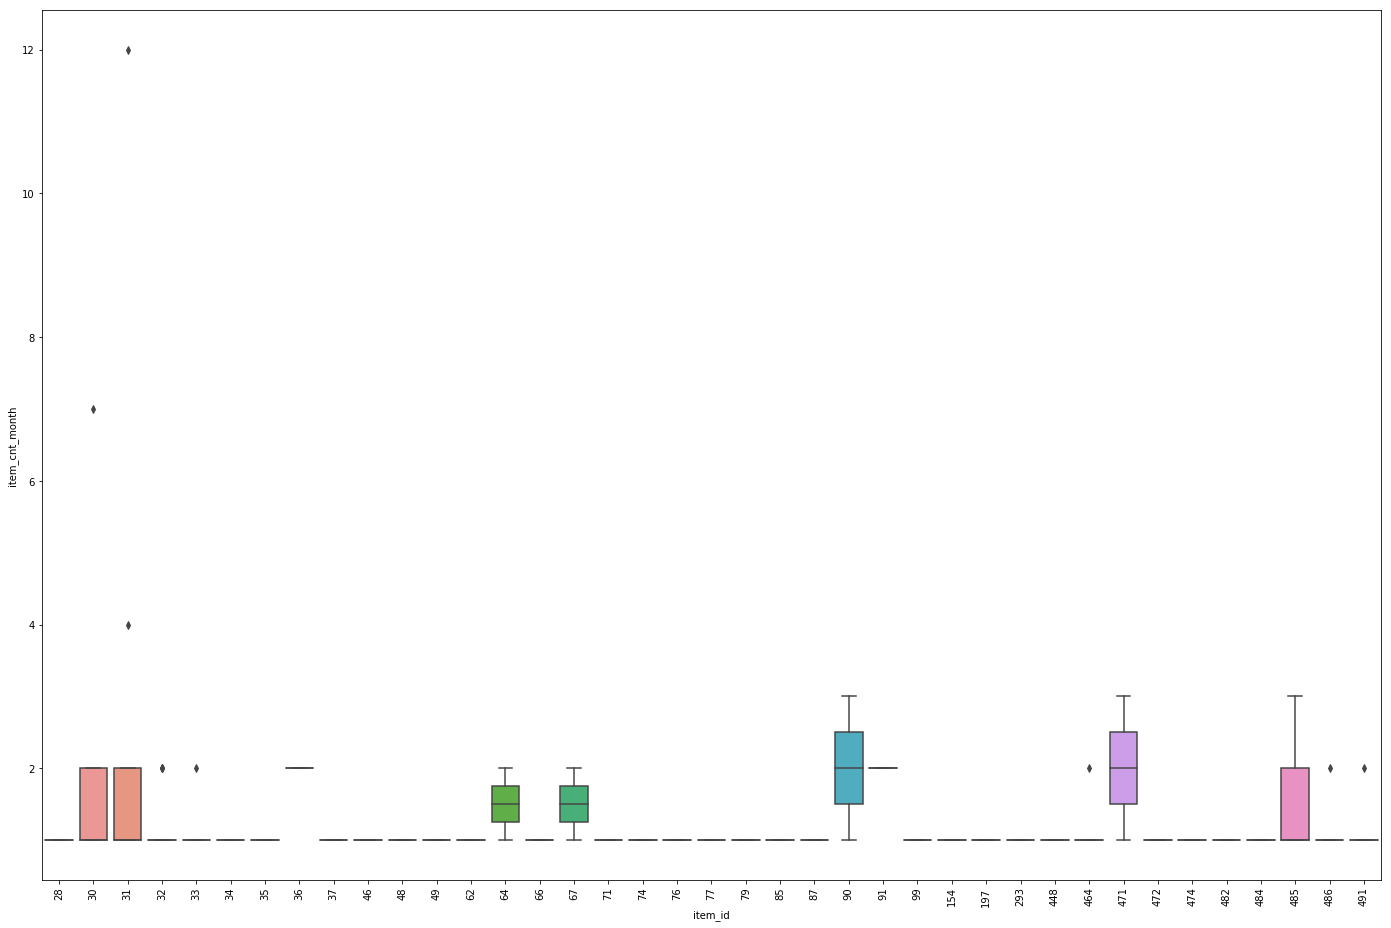

In [47]:
fig = plt.figure(figsize=(24,16))

sns.boxplot(x="item_id", y="item_cnt_month", data=tempDf[(tempDf.item_id < 500) & (tempDf.shop_id == np.random.randint(59))])
plt.xticks(rotation =90)
# plt.ylim(0,50)

In [48]:
tmpDf =trainDf.merge(shopDf, on ="shop_id", how="left").merge(itemsDf, on ="item_id", how="left").merge(itemsCatDf, on="item_category_id", how="left")
fig = plt.figure(figsize=(24,16))

sns.countplot(tmpDf.category)
plt.xticks(rotation= 90)
# tmpDf

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

In [49]:
# tmpDf =trainDf.merge(shopDf, on ="shop_id", how="left").merge(itemsDf, on ="item_id", how="left").merge(itemsCatDf, on="item_category_id", how="left")
fig = plt.figure(figsize=(24,16))
sns.countplot(tmpDf.subCategory)
plt.xticks(rotation= 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

# Distribution in train & test set

In [50]:
testDf = pd.read_csv(f"{root_path}/test.csv")

len(set(testDf.item_id) - set(trainDf.item_id)), len(testDf.item_id.unique())

(363, 5100)

In [51]:
len(set(testDf.shop_id) - set(trainDf.shop_id)), len(testDf.shop_id.unique())

(0, 42)

In [52]:
test_combo = testDf[["shop_id", "item_id"]].values.tolist()
test_combo = set([tuple(c) for c in test_combo])

train_combo = trainDf[["shop_id", "item_id"]].values.tolist()
train_combo = set([tuple(c) for c in train_combo])
len(test_combo - train_combo), len(test_combo)

(102796, 214200)

In [53]:
itemsCatDf

item_category_name  item_category_id  \
0                    PC - Гарнитуры/Наушники                 0   
1                           Аксессуары - PS2                 1   
2                           Аксессуары - PS3                 2   
3                           Аксессуары - PS4                 3   
4                           Аксессуары - PSP                 4   
5                        Аксессуары - PSVita                 5   
6                      Аксессуары - XBOX 360                 6   
7                      Аксессуары - XBOX ONE                 7   
8                             Билеты (Цифра)                 8   
9                            Доставка товара                 9   
10                     Игровые консоли - PS2                10   
11                     Игровые консоли - PS3                11   
12                     Игровые консоли - PS4                12   
13                     Игровые консоли - PSP                13   
14                  Игровые консоли - PSVita                14   
15                Игровые консоли - XBOX 360                15   
16                Игровые консоли - XBOX ONE                16   
17                  Игровые консоли - Прочие                17   
18                                Игры - PS2                18   
19                                Игры - PS3                19   
20                                Игры - PS4                20   
21                                Игры - PSP                21   
22                             Игры - PSVita                22   
23                           Игры - XBOX 360                23   
24                           Игры - XBOX ONE                24   
25                 Игры - Аксессуары для игр                25   
26                      Игры Android - Цифра                26   
27                          Игры MAC - Цифра                27   
28          Игры PC - Дополнительные издания                28   
29           Игры PC - Коллекционные издания                29   
30             Игры PC - Стандартные издания                30   
31                           Игры PC - Цифра                31   
32         Карты оплаты (Кино, Музыка, Игры)                32   
33                      Карты оплаты - Live!                33   
34              Карты оплаты - Live! (Цифра)                34   
35                        Карты оплаты - PSN                35   
36            Карты оплаты - Windows (Цифра)                36   
37                            Кино - Blu-Ray                37   
38                         Кино - Blu-Ray 3D                38   
39                         Кино - Blu-Ray 4K                39   
40                                Кино - DVD                40   
41                      Кино - Коллекционное                41   
42             Книги - Артбуки, энциклопедии                42   
43                        Книги - Аудиокниги                43   
44                Книги - Аудиокниги (Цифра)                44   
45                     Книги - Аудиокниги 1С                45   
46                 Книги - Бизнес литература                46   
47                    Книги - Комиксы, манга                47   
48           Книги - Компьютерная литература                48   
49         Книги - Методические материалы 1С                49   
50                          Книги - Открытки                50   
51         Книги - Познавательная литература                51   
52                      Книги - Путеводители                52   
53         Книги - Художественная литература                53   
54                             Книги - Цифра                54   
55       Музыка - CD локального производства                55   
56       Музыка - CD фирменного производства                56   
57                              Музыка - MP3                57   
58                            Музыка - Винил                58   
59                Музыка - Музыкальное видео                59   


In [54]:
itemsDf = itemsDf.merge(itemsCatDf, on="item_category_id", how="left", suffixes=("",""))

test_combo = testDf.merge(itemsDf, on ="item_id", how="left")[["category", "item_id"]].values.tolist()
test_combo = set([tuple(c) for c in test_combo])

train_combo = trainDf.merge(itemsDf, on ="item_id", how="left")[["category", "item_id"]].values.tolist()
train_combo = set([tuple(c) for c in train_combo])
len(test_combo - train_combo), len(test_combo)

(363, 5100)

In [55]:
test_combo = testDf.merge(itemsDf, on ="item_id", how="left")[["subCategory", "item_id"]].values.tolist()
test_combo = set([tuple(c) for c in test_combo])

train_combo = trainDf.merge(itemsDf, on ="item_id", how="left")[["subCategory", "item_id"]].values.tolist()
train_combo = set([tuple(c) for c in train_combo])
len(test_combo - train_combo), len(test_combo)

(363, 5100)

In [56]:
test_combo = testDf.merge(shopDf, on ="shop_id", how="left")[["city_code", "item_id"]].values.tolist()
test_combo = set([tuple(c) for c in test_combo])

train_combo = trainDf.merge(shopDf, on ="shop_id", how="left")[["city_code", "item_id"]].values.tolist()
train_combo = set([tuple(c) for c in train_combo])
len(test_combo - train_combo), len(test_combo)

(64440, 142800)

In [57]:
test_combo = testDf.merge(shopDf, on ="shop_id", how="left").merge(itemsDf, on ="item_id", how="left")[["shop_id","category", "item_id"]].values.tolist()
test_combo = set([tuple(c) for c in test_combo])

train_combo = trainDf.merge(shopDf, on ="shop_id", how="left").merge(itemsDf, on ="item_id", how="left")[["shop_id", "category", "item_id"]].values.tolist()
train_combo = set([tuple(c) for c in train_combo])
len(test_combo - train_combo), len(test_combo)

(102796, 214200)

Short notes:

* A few items only exist in test set
* Almost half of the shop-item combo is new
* Only a few category-item combo is new
* Only a few subcategory-item combo is new
* Almost half of the city-item combo is new
* Almost half of the shop-category-item combo is new

This is something important to bear in mind when doing feature engineering

In [59]:
trainDf

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

/home/deploy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=26.0, right=26.0
  'left=%s, right=%s') % (left, right))


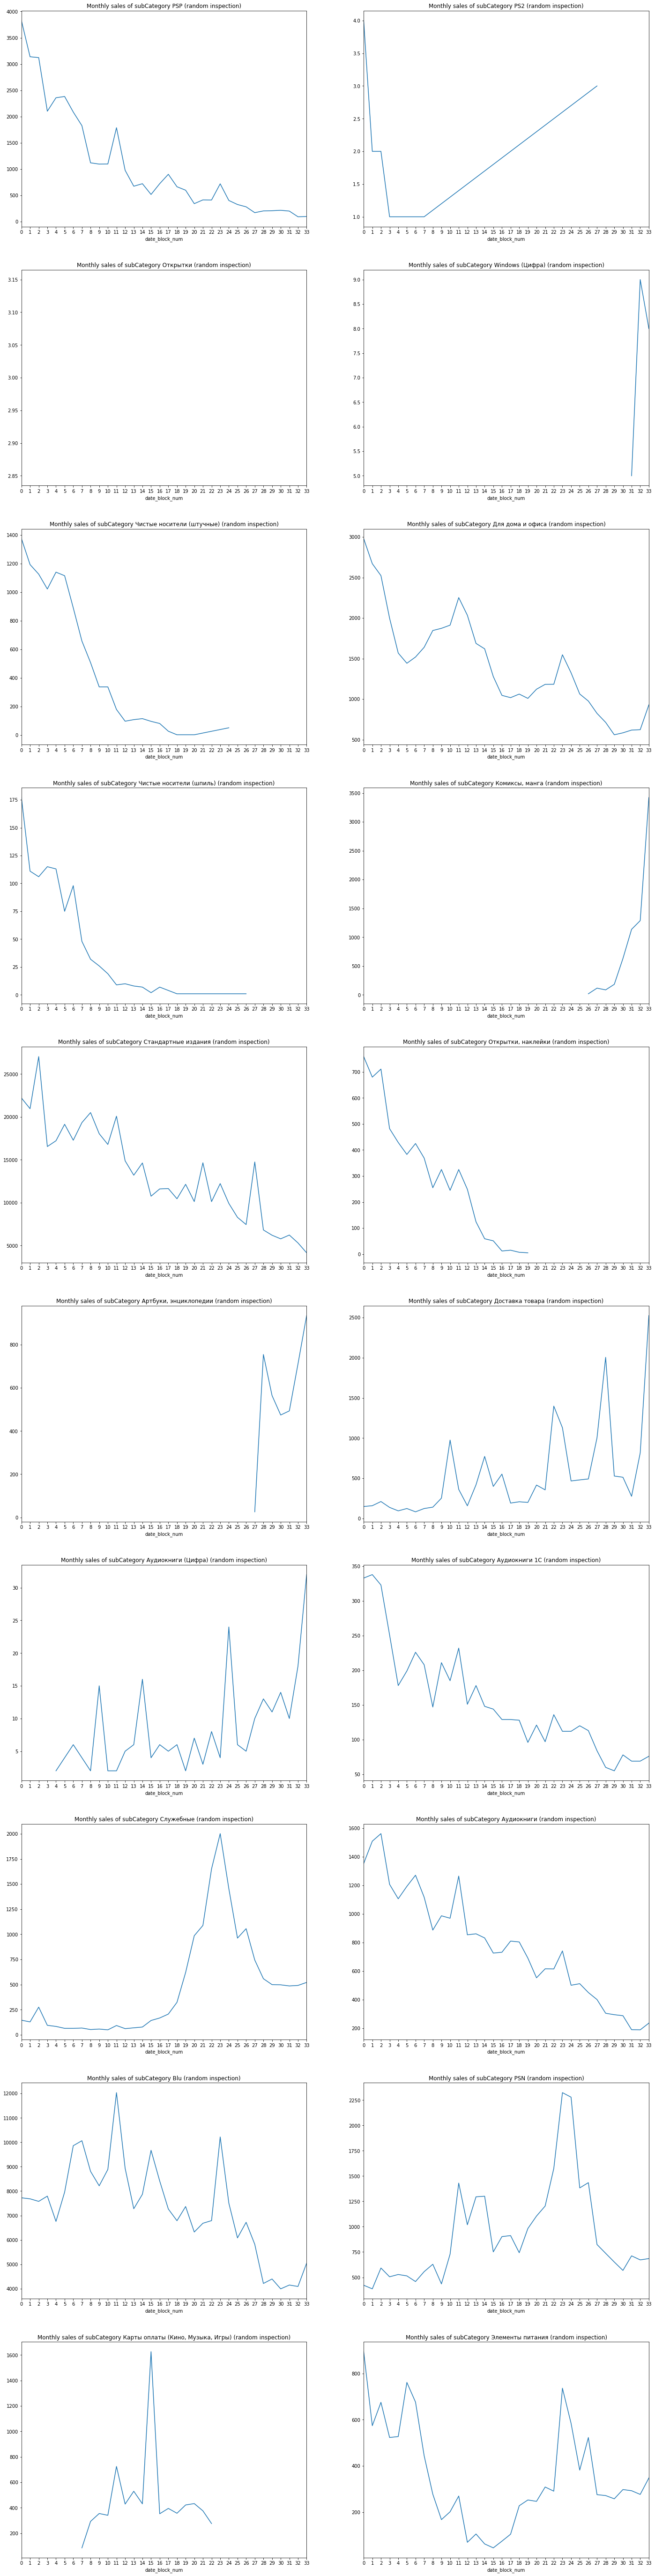

In [70]:
fig, axes = plt.subplots(nrows = 10, ncols = 2, figsize = (24, 100))
choices = tempDf.subCategory.unique().tolist()
np.random.shuffle(choices)
for row in axes:
    for ax in row:
        
        num = choices.pop()
        # print (num)
        tempDf[tempDf.subCategory == num].groupby(["date_block_num"]).item_cnt_month.sum().plot(ax = ax)
        ax.set_title(f"Monthly sales of subCategory {num} (random inspection)")
        ax.set_xticks(tempDf.date_block_num.sort_values().unique())
        ax.set_xlim(0,33)

In [72]:
fig, axes = plt.subplots(nrows = 10, ncols = 2, figsize = (24, 100))
choices = tempDf.category.unique().tolist()
np.random.shuffle(choices)
for row in axes:
    for ax in row:
        
        num = choices.pop()
        # print (num)
        tempDf[tempDf.category == num].groupby(["date_block_num"]).item_cnt_month.sum().plot(ax = ax)
        ax.set_title(f"Monthly sales of category {num} (random inspection)")
        ax.set_xticks(tempDf.date_block_num.sort_values().unique())
        ax.set_xlim(0,33)

In [61]:
tempDf

date_block_num  shop_id  item_id  item_cnt_month  \
0                     0       59    22154             1.0   
1                     0       24    22154             1.0   
2                     0       27    22154             1.0   
3                     0       25    22154             5.0   
4                     0        6    22154             1.0   
...                 ...      ...      ...             ...   
1609119              33       25     8428             1.0   
1609120              33       25     7903             1.0   
1609121              33       25     7610             1.0   
1609122              33       25     7635             1.0   
1609123              33       25     7640             1.0   

                                                 item_name  item_category_id  \
0                                        ЯВЛЕНИЕ 2012 (BD)                37   
1                                        ЯВЛЕНИЕ 2012 (BD)                37   
2                                        ЯВЛЕНИЕ 2012 (BD)                37   
3                                        ЯВЛЕНИЕ 2012 (BD)                37   
4                                        ЯВЛЕНИЕ 2012 (BD)                37   
...                                                    ...               ...   
1609119                       АХ, ВОДЕВИЛЬ, ВОДЕВИЛЬ (rem)                40   
1609120  XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...                15   
1609121      WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13                64   
1609122  WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...                64   
1609123  WARHAMMER MINIATURES: Stormcast Eternals Palad...                64   

                 item_category_name         category      subCategory  
0                    Кино - Blu-Ray             Кино              Blu  
1                    Кино - Blu-Ray             Кино              Blu  
2                    Кино - Blu-Ray             Кино              Blu  
3                    Кино - Blu-Ray             Кино              Blu  
4                    Кино - Blu-Ray             Кино              Blu  
...                             ...              ...              ...  
1609119                  Кино - DVD             Кино              DVD  
1609120  Игровые консоли - XBOX 360  Игровые консоли         XBOX 360  
1609121   Подарки - Настольные игры          Подарки  Настольные игры  
1609122   Подарки - Настольные игры          Подарки  Настольные игры  
1609123   Подарки - Настольные игры          Подарки  Настольные игры  

[1609124 rows x 9 columns]